# 1- Introduction.
>The data analyses that is presented here is based on the Ford Go bike dataset. It has data on bike share system for the month of February, 2019. It has 16 columns that record the following about each bike renting incident:
>1. Trip Duration, 
2. start and end time,
2. start and end stations and their longitudes and latitudes,
3. user type, birth year and gender.


In [27]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np
import pylab as pl

In [28]:
# Reading the csv file in the bike_df variable
bike_df=pd.read_csv('201902-fordgobike-tripdata.csv')

# 2- Data Wrangling

#### 1. The start_time and end_time fields have been converted to datetime objects.
#### 2. The Null values percentage was calculated and it represented about 9% of the data.
#### 3. The null values have been removed.

In [29]:
bike_df.start_time = pd.to_datetime(bike_df.start_time)
bike_df.end_time = pd.to_datetime(bike_df.end_time)

In [30]:
bike_df.dropna(inplace=True)

#### 4. The member_birth_year had some outliers and they were removed.

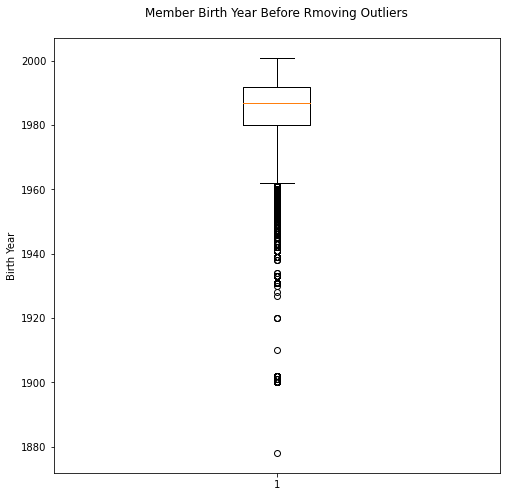

In [31]:
plt.figure(figsize=(8, 8))
plt.title('Member Birth Year Before Rmoving Outliers\n')
plt.ylabel('Birth Year')          
plt.boxplot(bike_df.member_birth_year);

In [32]:
bike_df=bike_df.query('member_birth_year>1966')

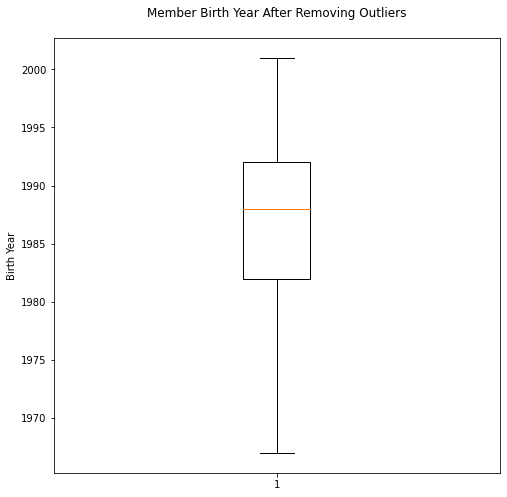

In [33]:
# Making sure that the outliers of birth year variable are removed
plt.figure(figsize=(8, 8))
plt.title('Member Birth Year After Removing Outliers\n')
plt.ylabel('Birth Year')          
plt.boxplot(bike_df.member_birth_year.astype(int));

#### 5. The maximum and minimum of the start  time and end time fields have been checked to detect the range of time covered by the data set. It was found that the data set covers the month of February, 2019 as shown below:

In [34]:
# First, let's check the maximum and minimum values of the start_time and end_time variables in order to find out
# the range of the dates during which the bikes were rented.
print("Start Time Minimum:     ", bike_df.start_time.min())
print("Start Time Maximum:     ", bike_df.start_time.max())
print("End Time Minimum:       ", bike_df.end_time.min())
print("End Time Maximum:       ", bike_df.end_time.max())

Start Time Minimum:      2019-02-01 00:00:20.636000
Start Time Maximum:      2019-02-28 23:59:18.548000
End Time Minimum:        2019-02-01 00:04:52.058000
End Time Maximum:        2019-03-01 08:01:55.975000


#### 6. A new field named approximate_age has been created to hold the approximate ages of the bike riders. In order to calculate the approximate ages, the birth year was subtracted from 2019.

In [35]:
# Calculating the approximate ages of the bike riders and saving them into a new variable named "approximate_age".
bike_df['approximate_age']=2019-bike_df.member_birth_year.astype(int)

In [36]:
# Checking the new variable values
print("The approximate ages of the bike riders sorted ascendingly.\n", sorted(bike_df.approximate_age.unique()))

The approximate ages of the bike riders sorted ascendingly.
 [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]


#### 7. The trip duration_sec field had some outliers and they were removed.

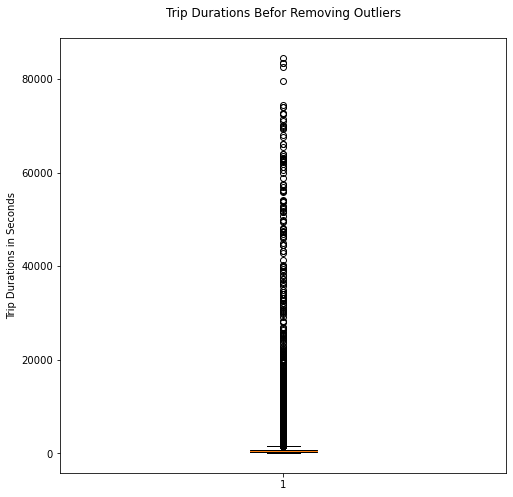

In [37]:
plt.figure(figsize=(8, 8))
plt.title('Trip Durations Befor Removing Outliers\n')
plt.ylabel('Trip Durations in Seconds')          
plt.boxplot(bike_df.duration_sec);

In [38]:
bike_df=bike_df.query('duration_sec<1310.0')

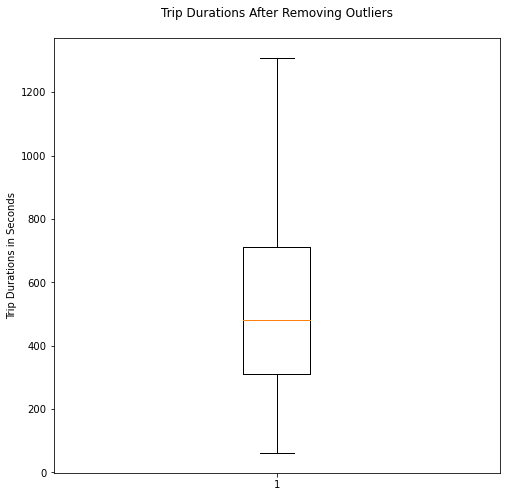

In [39]:
# Making sure that the outliers of duration_sec variable are removed
plt.figure(figsize=(8, 8))
plt.title('Trip Durations After Removing Outliers\n')
plt.ylabel('Trip Durations in Seconds')          
plt.boxplot(bike_df.duration_sec);

#### 8. A new variable named age_groups has been created to hold the age groups. The following shows the value counts of this new field:

In [40]:
mybins=[17,19,24,29,34,39,44,49,54]
bins_titles=['=< 19', '20 to 24', '25 to 29', '30 to 34', '35 to 39', '40 to 44', '45 to 49', '50 to 52']
bike_df['age_groups']=pd.cut(bike_df['approximate_age'], mybins, labels=bins_titles)

In [41]:
# Checking the new variable
bike_df.age_groups.value_counts()

25 to 29    39517
30 to 34    39223
35 to 39    25053
20 to 24    19521
40 to 44    13380
45 to 49     9252
50 to 52     4287
=< 19        1460
Name: age_groups, dtype: int64

#### 9. Four new variables have been created to hold the start and end hours and days. The following are the values of each variable of them:

In [42]:
bike_df['start_hour']=bike_df.start_time.dt.hour
bike_df['end_hour']=bike_df.end_time.dt.hour
bike_df['start_day']=bike_df.start_time.dt.day_name()
bike_df['end_day']=bike_df.end_time.dt.day_name()

In [43]:
# Checking the new variables
print("Start Hours:  ", sorted(bike_df.start_hour.unique()))
print("End Hours:    ", sorted(bike_df.end_hour.unique()))
print("Start Days:   ", sorted(bike_df.start_day.unique()))
print("End Days:     ", sorted(bike_df.start_day.unique()))

Start Hours:   [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
End Hours:     [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
Start Days:    ['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']
End Days:      ['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']


# 3- Data Analysis

#### 1. Plotting the percentages of the different genders to see which gender has the highest / lowest percentage.

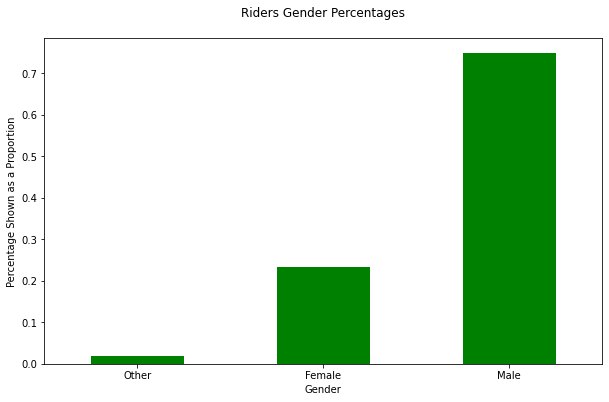

In [44]:
gender_percent=bike_df.member_gender.value_counts(sort=False)/bike_df.shape[0]
gender_percent.plot(kind = 'bar', title = 'Riders Gender Percentages\n',
            xlabel= 'Gender', ylabel='Percentage Shown as a Proportion', figsize = (10,6), color='green');
plt.xticks(rotation=0);

#### About 75% of the riders are males, and about 23% are females and the rest belong to the gender "other".

#### 2. Plotting the distribution of bike riders for the different hours of the day to see which hours have more riders.

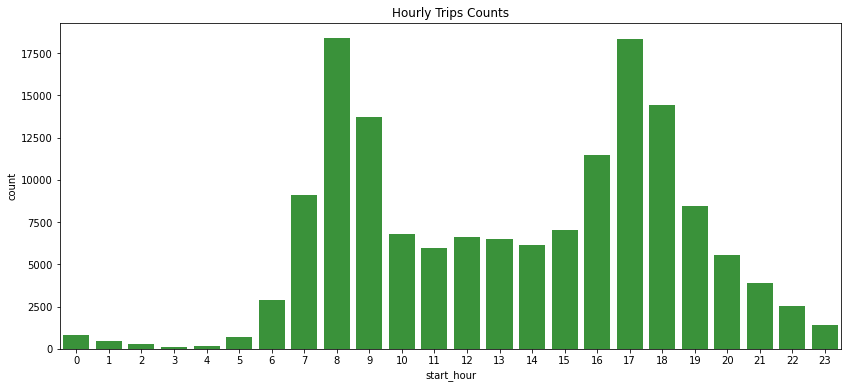

In [45]:
base_color = sb.color_palette()[2]
plt.figure(figsize=(14,6))
sb.countplot(x=bike_df.start_hour, color=base_color);
plt.title('Hourly Trips Counts');

#### More bikes are rented between 7 am and 9 am and between 4 pm and 6 pm. The least number of bikes is rented at 3:00 am. The most number is rented at 5:00 pm. From midnight to 4:00 am, the number of bike riders decreases gradually. Starting at 5:00 am, the number increases reaching its morning peak at 8:00 am. Then it decreases again until it almost stabilizes between 10:00 am and 3:00 pm. Then it increases again until it reaches its afternoon peak at 5:00 pm. Finally it decreases again reaching its lowest value at 3:00 am.

In [46]:
# Creating a dataframe for early rides that start between midnight and 6 am exclusive..
early_df=bike_df.query('start_hour<6')

# Creating a dataframe for rush hours rides that take place between 6:00 am and 10 am exclusive and 
# between 3:00 pm and 7:00 pm exclusive.
rush_df=bike_df.query('6<start_hour<10 or 15<start_hour<19' )

# Creating a dataframe for normal hours rides (any hour that is neither a rush hour nor an early hour is a normal hour).
normal_hours_df=bike_df.query('-1<start_hour<7 or 9<start_hour<16 or 18<start_hour<24' )

#### 3. Comparing the number of riders in each gender with the trip duration mean for each gender.

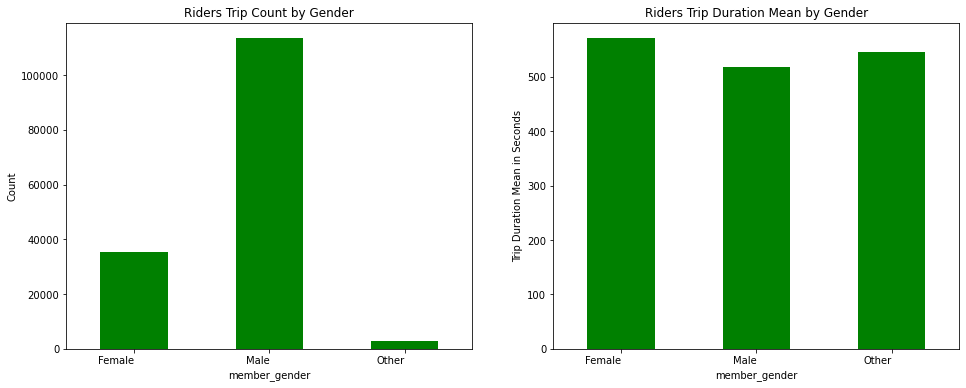

In [47]:
# Getting the count of the riders in each gender
gender_count = bike_df.groupby('member_gender').duration_sec.count()
# Getting the average of trip durations for each gender
gender_duration=bike_df.groupby('member_gender').duration_sec.mean()
#Plotting both the count and duration mean of the trips of each gender
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,6))
gender_count.plot(kind='bar', ax=ax1, color = 'green', title='Riders Trip Count by Gender', ylabel='Count');
gender_duration.plot(kind='bar', ax=ax2, color = 'green', title='Riders Trip Duration Mean by Gender', ylabel='Trip Duration Mean in Seconds');
plt.setp(ax1.get_xticklabels(), rotation=0, ha='right')
plt.setp(ax2.get_xticklabels(), rotation=0, ha='right')
plt.show()

#### Although there are more males than females and there are more females than other, the trip duration means for the three genders are similar with minor differences.

#### 4. Comparing trip duration means and counts for subscribers and customers.

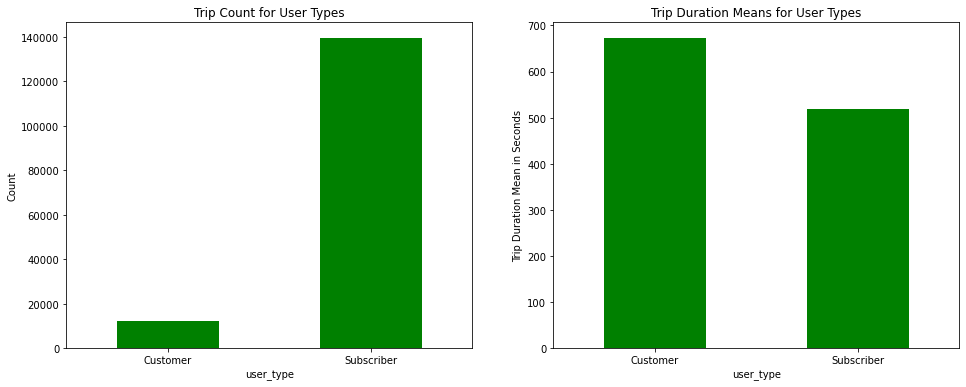

In [48]:
user_type_count_over_ages=bike_df.groupby('user_type').duration_sec.count()
user_type_duration_over_ages=bike_df.groupby('user_type').duration_sec.mean()
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))
user_type_count_over_ages.plot(kind='bar',ax=ax1, color = 'green', title='Trip Count for User Types', ylabel ='Count');
user_type_duration_over_ages.plot(kind='bar', ax=ax2, color = 'green', title='Trip Duration Means for User Types', ylabel='Trip Duration Mean in Seconds');
plt.setp(ax1.get_xticklabels(), rotation=0, ha='center')
plt.setp(ax2.get_xticklabels(), rotation=0, ha='center')
plt.show()

#### The two plots above show that though the customers represent a minority in the dataset, their trip duration mean is higher than that of the subscribers.

#### 5. Comparing the gender percentages for each age group.

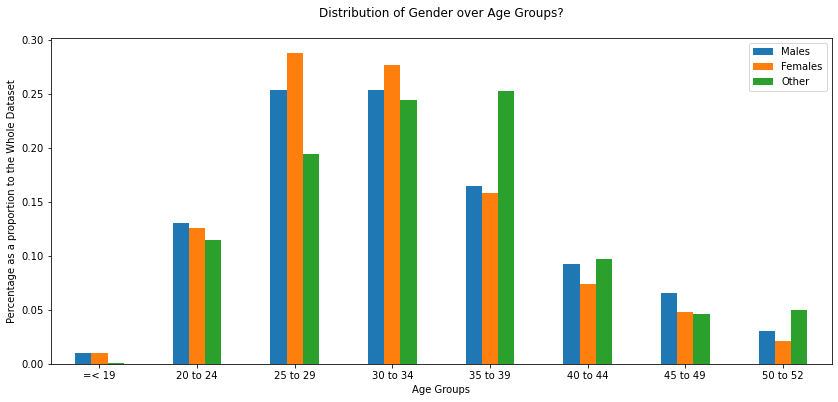

In [49]:
# Creating dataframes for the three genders
males=bike_df[bike_df['member_gender']=='Male']
females=bike_df[bike_df['member_gender']=='Female']
other=bike_df[bike_df['member_gender']=='Other']
# Calculating the proportion of each gender in each age group to the whole number of genders.
m=males.age_groups.value_counts()/males.shape[0]
f=females.age_groups.value_counts()/females.shape[0]
o=other.age_groups.value_counts()/other.shape[0]
# Creating a dataframe with the proportions calculated above.
c=pd.DataFrame({'Males':m,'Females':f, 'Other':o})
# Plotting the percentages of each gender in each age group
c.plot(kind = 'bar', title = 'Distribution of Gender over Age Groups?\n',
            xlabel= 'Age Groups', ylabel='Percentage as a proportion to the Whole Dataset', figsize = (14,6));
plt.xticks(rotation=0);

#### Each gender is normally distributed over the different age groups with the highest percentages in ages between 25 and 39. The percentages of females in most age groups is lower than that of males except for ages between 25 and 34 . The "other" gender is lower than both males and females except in ages between 35 and 39, between 40 and 44 and between 50 and 52.

#### 6. Comparing the trips counts of the different genders with the trips duration mean of each gender for each day of the week.

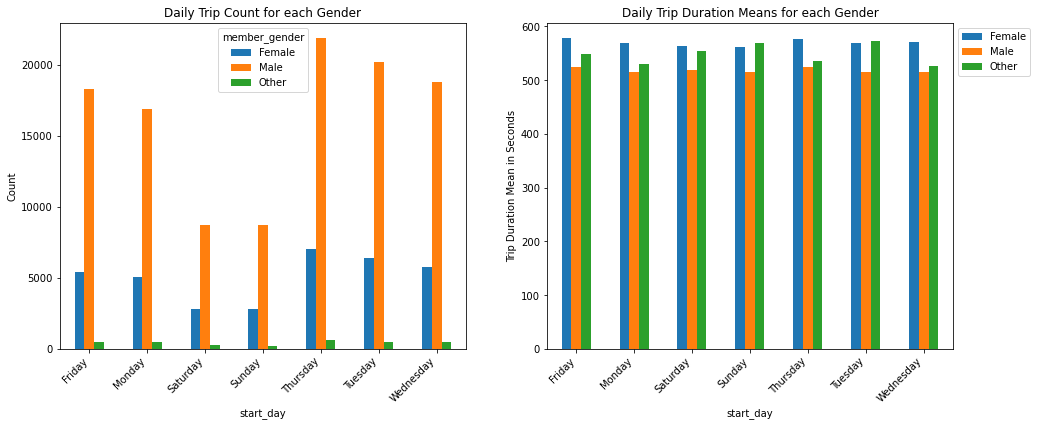

In [50]:
agg_trip_count=bike_df.groupby(['start_day', 'member_gender'])['duration_sec'].count().unstack()
agg_trip_duration=bike_df.groupby(['start_day', 'member_gender'])['duration_sec'].mean().unstack()
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))
agg_trip_count.plot(kind='bar',ax=ax1, title='Daily Trip Count for each Gender', ylabel ='Count');
agg_trip_duration.plot(kind='bar', ax=ax2, title='Daily Trip Duration Means for each Gender', ylabel='Trip Duration Mean in Seconds');
plt.legend(bbox_to_anchor=(1, 1));
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')
plt.setp(ax2.get_xticklabels(), rotation=45, ha='right')
plt.show()

#### The left plot shows that the number of riders is higher on weekdays than on weekends. Moreover, the male count is higher than the other two genders and the "Other" gender is the least. The right plot shows that the trip duration means are similar for the different days with minor insignificant differences. Also the trip duration means show very small differences among the different genders.

In [51]:
def compare_count_duration(df, title_1=None, title_2=None):
    # This function is used to compare the count of the trips and their duation means for the different genders over the 
    # days of the week. It will be used to carry out comparisons for the different times of the day, i.e. rush hours, 
    # normal hous and early hours.
    count = df.groupby(['start_day', 'member_gender'])['duration_sec'].count().unstack()
    duration = df.groupby(['start_day', 'member_gender'])['duration_sec'].sum().unstack()
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,6))
    count.plot(kind='bar', stacked=True, ax=ax1, title=title_1, ylabel='Count');
    duration.plot(kind='bar', stacked=True, ax=ax2, title= title_2, ylabel='Duration Total in Seconds');
    plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')
    plt.setp(ax2.get_xticklabels(), rotation=45, ha='right')
    plt.show()

#### 7. Comparing the number of rush hours riders with their trip duration means for each gender and day.

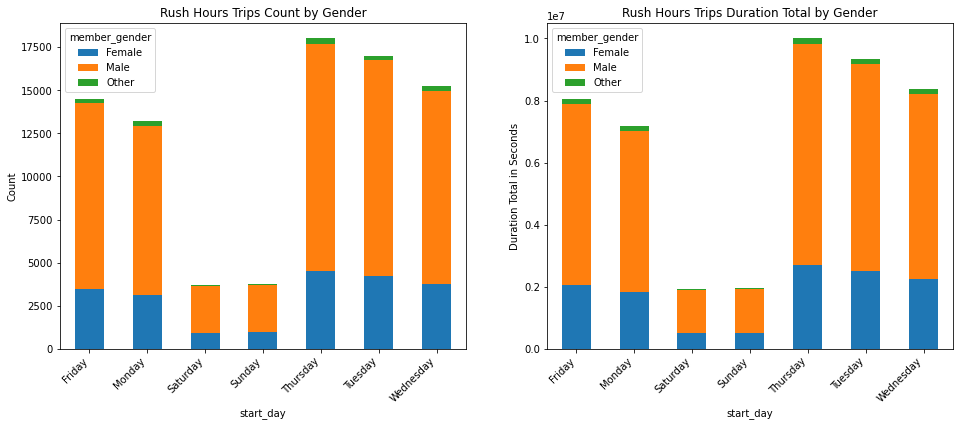

In [52]:
compare_count_duration(rush_df, 'Rush Hours Trips Count by Gender', 'Rush Hours Trips Duration Total by Gender')

#### Both the count and duration of the rush hours trips are similar. The smallest number of rides and the shortest ride periods are on weekends. So there is a tendency for all genders to go on bike rides on rush hours on weekdays more than on weekends. 

### Summary

1. About 75% of the riders are males, 23% are females and the rest are "other".
2. The most bikes are rented during the rush hours and the least ones are rented during the very early hours.
3. Although there are more males than females and there are more females than other, the trip duration means for the three genders are similar with minor differences.
4. Although the customers represent a minority in the dataset, their trip duration mean is higher than that of the subscribers.
5. Each gender is normally distributed over the different age groups with the highest percentages in ages between 25 and 39.
6. The trip duration means show very small differences among the different genders.
7.  Both the count and duration of the rush hours trips are similar. The smallest number of rides and the shortest ride periods are on weekends. So there is a tendency for all genders to go on bike rides on rush hours on weekdays more than on weekends. 
